# 7. Персептрон

In [2]:
from setup_libs import *

In [1]:
import torch

## 7.1 Нейрон (персептрон)

### Устройство нейрона

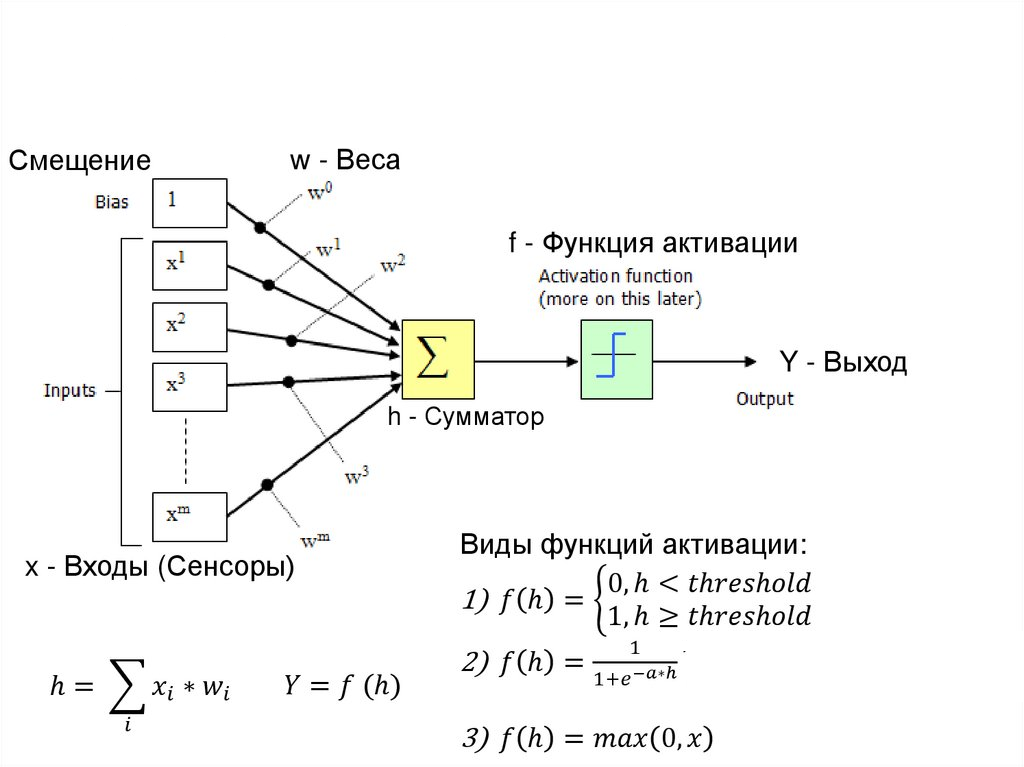

In [2]:
Image('images/perc1.png')

In [3]:
from torch.nn import Linear, Sigmoid, Sequential, Threshold

x = torch.FloatTensor([[.5, .5]])

h = Linear(2, 1) # по сути матричное перемножение на веса 2 -> 1

# если ручками не обозначить, то будет произвольные значения браться
h.weight.data = torch.FloatTensor([[1, 1]])
h.bias.data   = torch.FloatTensor([[-1]])

f = Sigmoid()

def net(x):
    return f(h(x))

net(x)

tensor([[0.5000]], grad_fn=<SigmoidBackward>)

Рисуем линию
$x_1 + x_2 - 1 = 0$

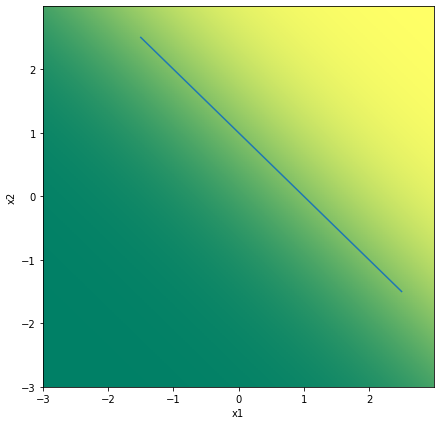

In [6]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = net(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='summer')
plt.xlabel('x1')
plt.ylabel('x2')

x_1 = np.linspace(-1.5, 2.5, 100)
x_2 = 1 - x_1 

ax.plot(x_1, x_2)

### Логические функции через нейрон

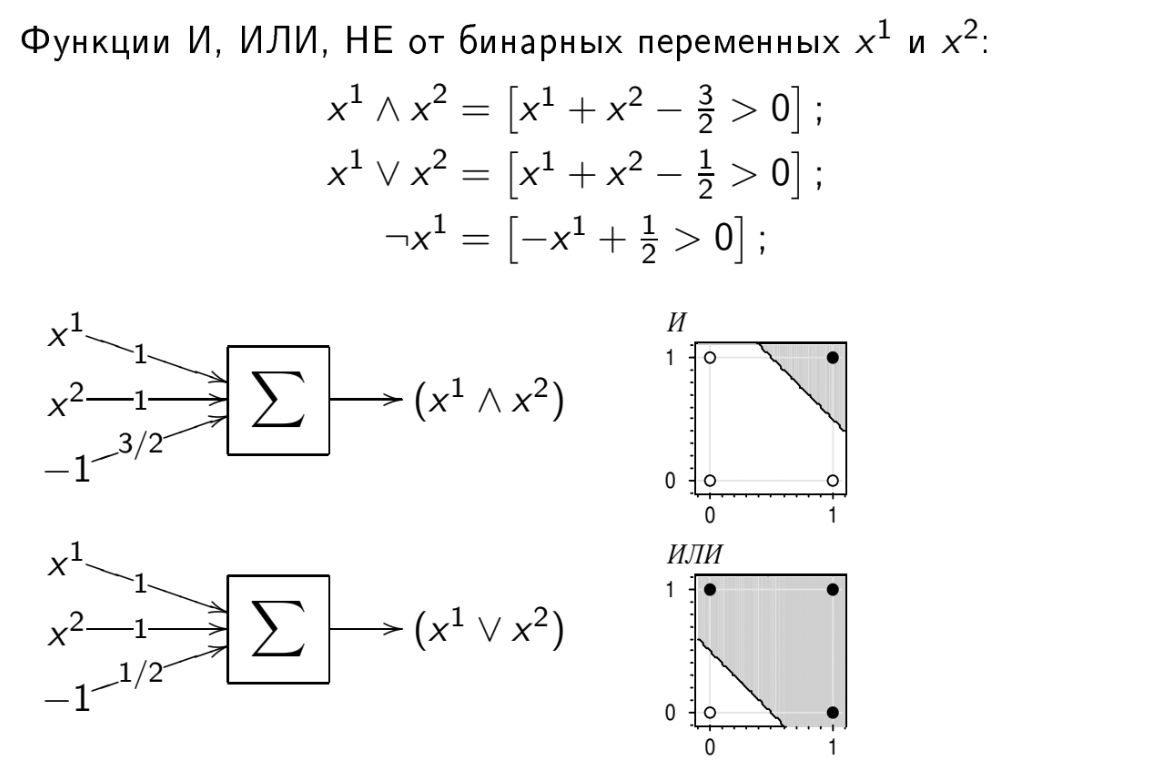

In [15]:
Image('images/logic1.png', width=800)

In [9]:
x = torch.FloatTensor([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

In [12]:
def AND(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]])
    lin.bias.data   = torch.FloatTensor([[-1.5]])

    return (lin(x) > 0).float() # функция активации

AND(x)

tensor([[0.],
        [0.],
        [0.],
        [1.]])

In [13]:
def OR(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]]) 
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float() #функция активации

OR(x)

tensor([[0.],
        [1.],
        [1.],
        [1.]])

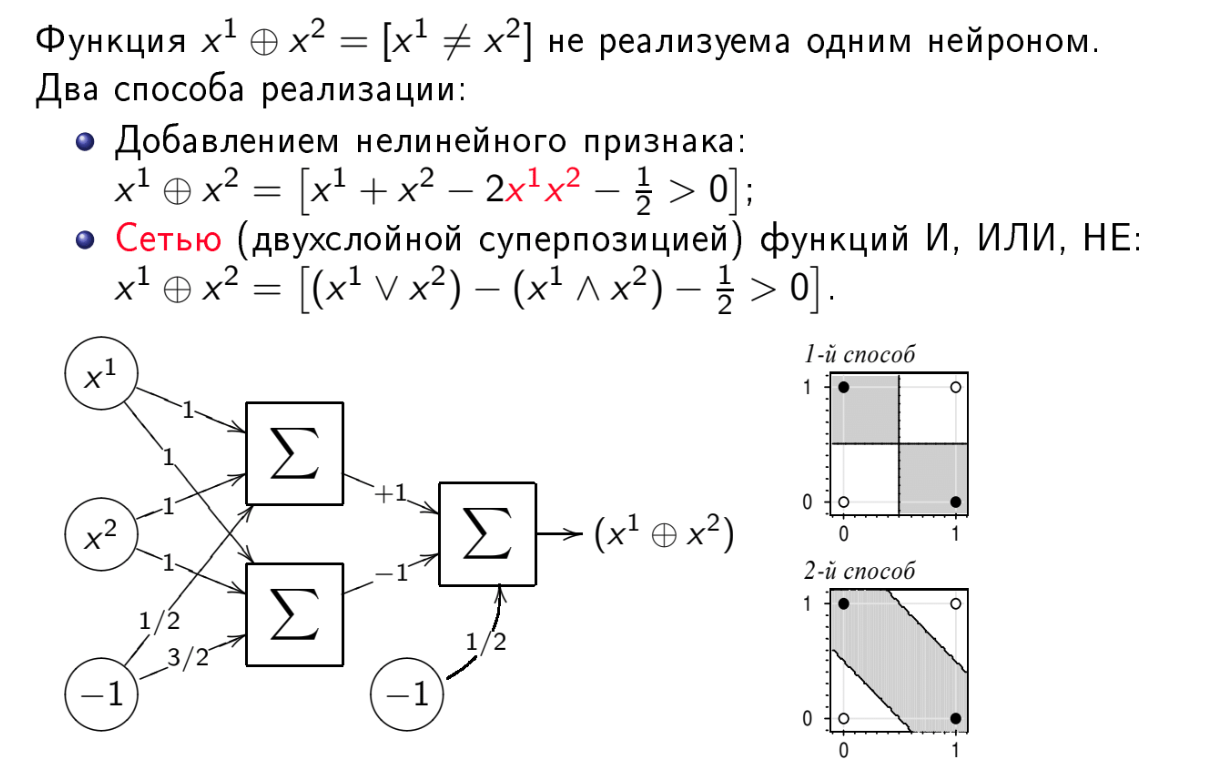

In [13]:
Image('images/xor.png', width=800)

In [137]:
second_input = torch.cat([OR(x), AND(x)], dim=1)
second_input

tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])

In [125]:
def XOR(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, -1]])
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float()

XOR(second_input) 

tensor([[0.],
        [1.],
        [1.],
        [0.]])

Зачем обозначать руками нейроны, когда можно целые слои  

In [141]:
def OR_AND(x):
    lin1 = Linear(2, 2) #СЛОЙ 2->2
    
    lin1.weight.data = torch.FloatTensor([[1, 1], 
                                          [1, 1]])
    
    lin1.bias.data   = torch.FloatTensor([[-0.5, -1.5]])
    
    return (lin1(x) > 0).float()

XOR(OR_AND(x))

tensor([[0.],
        [1.],
        [1.],
        [0.]])

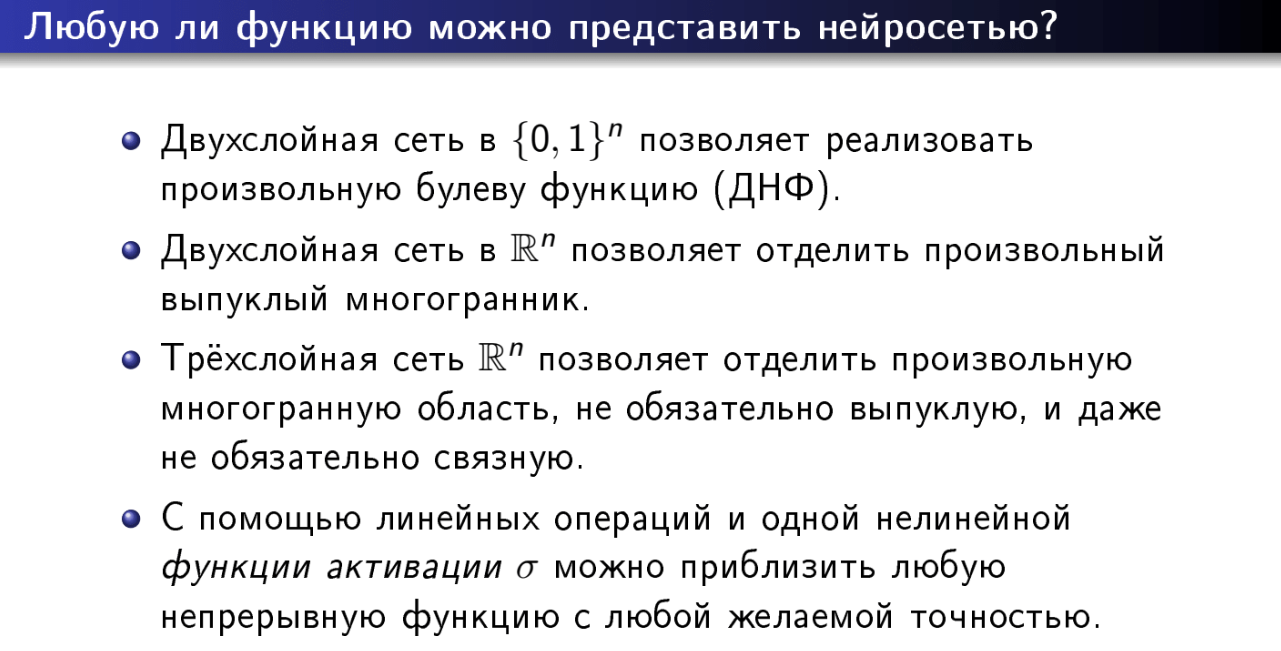

In [18]:
Image('images/percres.png', width=800)

## 7.2 Пример обучения одномерной нейронной сети
[Взято из туториала](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

Хотим с помощью нейронки обучить функцию $y = sin(x)$ 

в пространстве полиномов $y = a + bx + cx^2 + dx^3$

### 7.2.1 Градиентный спуск на торче и тензрах

99 1820.8154296875
199 1248.367431640625
299 857.7430419921875
399 590.885009765625
499 408.36895751953125
599 283.3945007324219
699 197.72227478027344
799 138.925537109375
899 98.52751922607422
999 70.7396011352539
1099 51.60428237915039
1199 38.41290283203125
1299 29.30925750732422
1399 23.019962310791016
1499 18.670446395874023
1599 15.659344673156738
1699 13.572757720947266
1799 12.125401496887207
1899 11.120512962341309
1999 10.422183990478516
Result: y = -0.03741372004151344 + 0.8384084701538086 x + 0.006454489193856716 x^2 + -0.09072276949882507 x^3


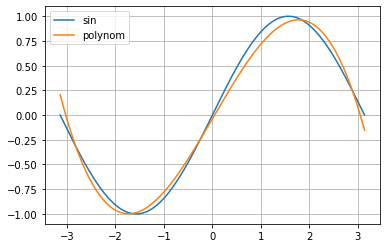

In [33]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
def f(x):
    return a + b * x + c * x**2 + d * x**3

plt.plot(x,np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

### 7.2.2 Используем Autograd

99 1749.682373046875
199 1195.597900390625
299 818.793701171875
399 562.2598876953125
499 387.4095458984375
599 268.0979309082031
699 186.59078979492188
799 130.84519958496094
899 92.67516326904297
999 66.50935363769531
1099 48.55207824707031
1199 36.214195251464844
1299 27.727588653564453
1399 21.883708953857422
1499 17.855100631713867
1599 15.074962615966797
1699 13.154302597045898
1799 11.826047897338867
1899 10.906509399414062
1999 10.269325256347656
Result: y = 0.03472558781504631 + 0.8378944396972656 x + -0.005990740843117237 x^2 + -0.09064964950084686 x^3


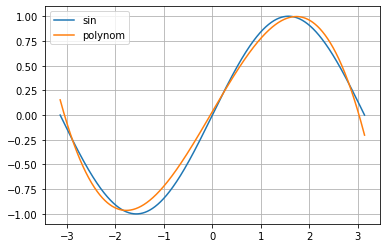

In [14]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

def f(x):
    return a.detach().numpy() + b.detach().numpy() * x + c.detach().numpy() * x ** 2 + d.detach().numpy() * x ** 3

xx = x.numpy()

plt.plot(xx, np.sin(x), label='sin')
plt.plot(xx, f(xx), label='polynom')
plt.legend()
plt.grid()

## 7.2.3 Используем нейросеть + встроенный лосс

In [77]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [78]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

99 89.09315490722656
199 62.340362548828125
299 44.52152633666992
399 32.6475830078125
499 24.731420516967773
599 19.451122283935547
699 15.927186012268066
799 13.574050903320312
899 12.001873016357422
999 10.950801849365234
1099 10.247666358947754
1199 9.776983261108398
1299 9.461677551269531
1399 9.2503080368042
1499 9.108503341674805
1599 9.0133056640625
1699 8.949331283569336
1799 8.906307220458984
1899 8.877347946166992
1999 8.857837677001953
Result: y = -0.0038636820390820503 + 0.8516575694084167 x + 0.0006665491382591426 x^2 + -0.09260733425617218 x^3


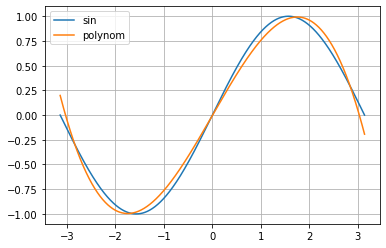

In [36]:
# Define model
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(xx) 

    # Compute loss: финальная нода с лоссом
    loss = loss_fn(y_pred, y)
    if it % 100 == 99:
        print(it, loss.item())

    # Обнулили градиенты с прошлой итерации
    model.zero_grad()    
        
    # Backward pass: просчитали градиенты назад
    loss.backward()

    # Update the weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            

# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

## 7.2.4 Используем стохастический спуск. Идея обособленного оптимайзера

99 301.5738830566406
199 208.08349609375
299 144.60220336914062
399 101.44984436035156
499 72.08370971679688
599 52.076778411865234
699 38.4307861328125
799 29.112537384033203
899 22.742332458496094
999 18.382455825805664
1099 15.394990921020508
1199 13.345670700073242
1299 11.938230514526367
1399 10.970572471618652
1499 10.304508209228516
1599 9.845539093017578
1699 9.528928756713867
1799 9.310281753540039
1899 9.159137725830078
1999 9.054546356201172
Result: y = -0.01386485155671835 + 0.8488554358482361 x + 0.0023919162340462208 x^2 + -0.09220875799655914 x^3


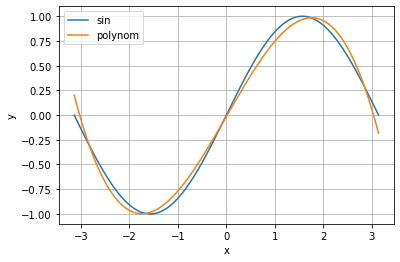

In [56]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Сделали шаблон сети
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбоали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# Спуск
for t in range(2000):
    
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

![title](https://cs231n.github.io/assets/nn3/opt1.gif)

## 7.2.5 А если взять несколько слоев?

99 957.3153076171875
199 817.2288818359375
299 713.58447265625
399 373.00909423828125
499 18.901187896728516
599 8.817447662353516
699 8.817166328430176
799 8.81716537475586
899 8.81716537475586
999 8.817164421081543
1099 8.817168235778809
1199 8.817167282104492
1299 8.817167282104492
1399 8.817167282104492
1499 8.817166328430176
1599 8.817166328430176
1699 8.817168235778809
1799 8.817167282104492
1899 8.817166328430176
1999 8.817166328430176


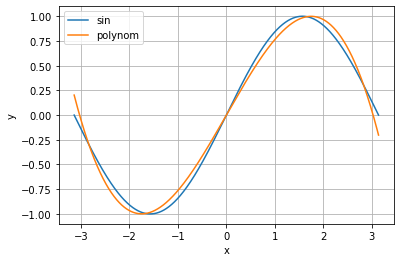

In [76]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# МНО00ГО00СЛО00ЙНАЯ СЕТЬ
model = torch.nn.Sequential(
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбоали алгоритм оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Спуск
for t in range(2000):
    
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    
# просто рисовалка   
# а вот тут формулы не существует :))
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, model(xx).detach().numpy(), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

# Так и еще раз на закрепление:
* FORWARD (посчитали вперед по существующей сети)
* LOSS (посчитали ошибку)
* ZERO_GRAD (обнулили ~~сроки~~ градиенты)
* BACKWARD (посчитали производные)
* UPDATE Weights (обновили веса)
